# CHAPTER 33: Predictive Modeling

### This code generates figures 2, 3, 4, 5, from Chapter 33: Predictove Modeling (vol II)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from functions import scalar_gaussian, vector_gaussian

## Logistic Function

In the logit model, the label $\gamma$ follows a Bernoulli distribution with its probability of success ($\gamma=+1$) defined by a logistic function, namely,

$$
\mathbb{P}(\boldsymbol{\gamma}=\gamma\,|\, w; h)\;=\;\frac{1}{1+e^{-\gamma h^{T} w}},\;\;\;\gamma\in\{-1+1\} \tag{33.18}
$$

Note that the sigmoid function $\sigma(x)\overset{\Delta}{=} 1/(1+e^{-x})$ maps real numbers $x\in \mathbb{R}$ to probability values in the range $[0,1]$, as illustrated in Fig. 33.2. We will encounter this logistic model again in  Chapter 59 with one important distinction in relation to the discussion in this chapter. There, the vector $w$ will be modeled as some $\textit{deterministic}$ unknown parameter and its value will be estimated by resorting to a  ML formulation and a stochastic gradient procedure. Here, in this section, we pursue instead a Bayesian formulation  where $w$ is modeled as some $\textit{random}$ variable arising from a Gaussian prior. This formulation leads to the Bayesian logit model. 

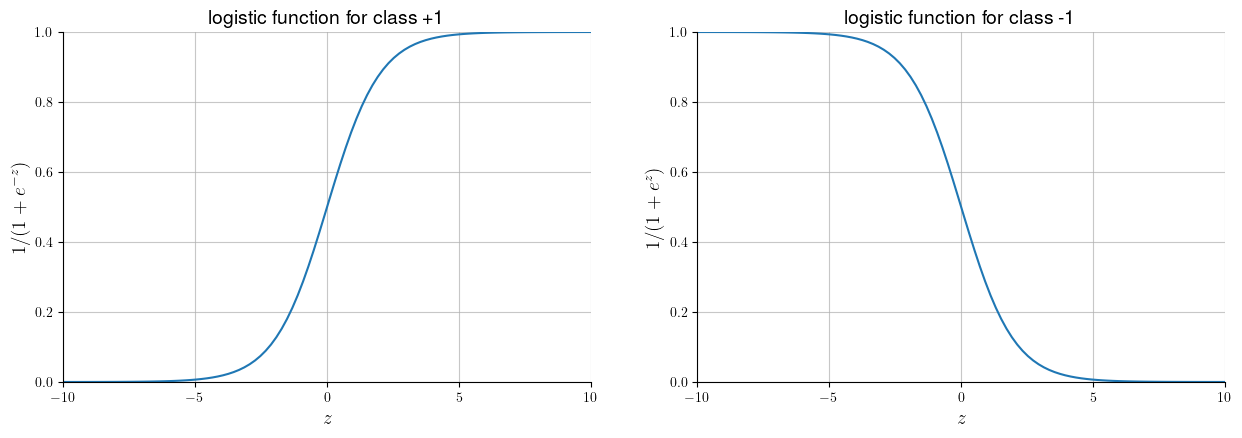

In [60]:
#generating figure 6 (sigmoidal functions)
x = np.linspace(-10, 10, 100)

f1 = 1/(1+np.exp(-x))
f2 = 1/(1+np.exp(x))

#figure 6 (sigmoidal functions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(x, f1)
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$1/(1+e^{-z})$', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([-10, 10])
plt.xticks(np.arange(-10, 15, 5))
ax.grid(alpha=0.7)
ax.set_title('logistic function for class +1', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(222)
ax.plot(x, f2)
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$1/(1+e^z)$', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([-10, 10])
plt.xticks(np.arange(-10, 15, 5))
ax.grid(alpha=0.7)
ax.set_title('logistic function for class -1', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

**Figure 33.2** Typical behavior of logistic functions for two classes. The figure shows plots of the functions $1/(1+e^{-x})$ ($\textit{left}$) and $1/(1+e^x)$ ($\textit{right}$) assumed to correspond to classes $+1$ and $-1$, respectively.

## Example 33.1 (Revisiting the logistic model with Gaussian latent variable)

We revisit the logit model from Section 33.1.2  and apply the Laplace method to approximate the posterior distribution.
 
We know from the numerator of (33.28) that
the joint pdf of the latent variable and the observations is proportional to:

$$
f_{w,\gamma_N}(w,\gamma_N; H_N)
\propto \left\{\prod_{n=1}^{N} \left(\frac{1}{1+e^{-h_n^{T} w}}\right)^{\frac{1+\gamma(n)}{2}}\,\left(\frac{1}{1+e^{h_n^{\sf T} w}}\right)^{\frac{1-\gamma(n)}{2}}\right\}\,e^{-\frac{1}{2\sigma_w^2}\|w\|^2} \tag{33.39}
$$

so that 


\begin{align*}
\ln f_{w,\gamma_N}(w,\gamma_N; H_N) &=\textnormal{cte} + \\
& \sum_{n=1}^{N} \left(\frac{1+\gamma(n)}{2}\right)\ln \left(\frac{1}{1+e^{-h_n^{\sf T} w}}\right)  \\
& +\sum_{n=1}^N  \left(\frac{1-\gamma(n)}{2}\right)\ln \left(\frac{1}{1+e^{h_n^{\sf T} w}}\right)-\frac{1}{2\sigma_w^2}\|w\|^2 \tag{33.40}
\end{align*}

from which we conclude that the gradient is given by

$$
\nabla_{w^{\sf T}}\left[\ln f_{w,\gamma_N}(w,\gamma_N; H_N)\right]\;=\;
-\frac{1}{\sigma_{w}^2} w+\sum_{n=1}^N \frac{1}{2} h_n \left(\gamma(n)-\frac{1-e^{-h_n^{\sf T} w}}{1+e^{-h_n^{\sf T} w}}\right) \tag{33.41}
$$

while the Hessian is given by

$$
\nabla_{w}^2\left[\ln f_{w,\gamma_N}(w,\gamma_N; H_N)\right]\;=\;
-\frac{1}{\sigma_{w}^2} I_{M} -\sum_{n=1}^N  \frac{e^{-h_n^{\sf T} w}}{(1+e^{-h_n^{\sf T} w})^2}\,h_n h_n^{\sf T}\overset{\Delta}{=} - R_{w}^{-1} \tag{33.42}
$$

The gradient ascent recursion for estimating $w_{\textnormal{MAP}}$ then takes the form:

$$
w^{(m)}=w^{(m-1)} + \mu(m) \nabla_{w^{\sf T}}\left[\ln f_{w,\gamma_N}\Bigl(w^{(m-1)},\gamma_N; H_N\Bigr)\right],\;\;\;m\geq 0 \tag{33.43}
$$


where $\mu(m)$ is a decaying step-size sequence. Once the recursion approaches $w_{\textnormal{MAP}}$, we approximate the desired conditional pdf by

$$
f_{w|\gamma_N}(w|\gamma_N; H_N) \approx {\cal N}_{w}(w_{\textnormal{MAP}},R_w) \tag{33.44}
$$

We can now use this result to approximate the predictive distribution of $\gamma$ given a new feature $h$. Indeed, introduce the auxiliary scalar variable:

$$
\boldsymbol{x} \overset{\Delta}{=} \gamma h^{\sf T} \boldsymbol{w} \tag{33.45}
$$

Conditioned on $\gamma$, and in view of the assumed Gaussian distribution (33.44) for $\boldsymbol{w}$ given all data, the variable $\boldsymbol{x}$ is also Gaussian-distributed with mean and variance given by: 

$$
f_{x|\gamma_N}(x|\gamma_N; H_N)\approx {\cal N}_{x}(\gamma\, h.T w_{\textnormal{MAP}},h^{\sf T} R_w h) \tag{33.46}
$$

The predictive distribution is given by

$$
\mathbb{P}(\gamma=\gamma|\gamma_N= \gamma_N; h,H_N)
=\int_{-\infty}^{\infty}
f_{\gamma,x|\gamma_N}(\gamma,x|\gamma_N; h, H_N)dx \tag{33.47}
$$

$$
=\int_{-\infty}^{\infty}
f_{\gamma|x}(\gamma;h)\, f_{x|\gamma_N}(x|\gamma_N;H_N)dx \\
$$

$$
=\int_{-\infty}^{\infty} \frac{1}{1+e^{-x}}{\cal N}(\gamma\, h^{\sf T} w_{\textnormal{MAP}},h^{\sf T} R_w h)dx \\ 
$$

$$
=\int_{-\infty}^{\infty} \frac{1}{1+e^{-x}}\frac{1}{(2\pi h^{\sf T} R_w h)^{1/2}}\,\textnormal{exp}\left\{-\frac{1}{2 h^{\sf T} R_w h}(x-\gamma\, h^{\sf T} w_{\textnormal{MAP}})^2\right\}dx
$$

The last integral is difficult to evaluate in closed form. However, it can be approximated by using two properties of Gaussian distributions. The first property is the following approximation for the sigmoid function from (4.13):

$$
\frac{1}{1+e^{-x}}\;\approx \Phi(a x),\;\;\;a^2=\pi/8 \tag{33.48}
$$

The second property uses the cdf (33.20) of the standard Gaussian distribution and result (4.7):

$$
\int_{-\infty}^{\infty} \Phi(y)\,\frac{1}{\sqrt{2\pi\sigma_{y}^2}}\,\textnormal{exp}\left\{-\frac{1}{2\sigma_y^2}(y-\mu)^2\right\}dy \;=\; \Phi\left(\frac{\mu}{\sqrt{1+\sigma_y^2}}\right) \tag{33.49}
$$

Using these two properties in (33.47) we conclude that 


$$
\mathbb{P}(\gamma=\gamma|\gamma_N=\gamma_N; h,H_N)\approx 
\Phi\left(\frac{a\gamma h^{\sf T} w_{\textnormal{MAP}}}{\sqrt{1+a^2h^{\sf T} R_w h}}\right) \tag{33.50}
$$

In summary, using the approximation (33.48) again, we arrive at the following approximation for the predictive distribution:

$$
\mathbb{P}(\gamma=\gamma|\gamma_N=\gamma_N; h,H_N)\approx 
\left(1+\textnormal{exp}\left\{-\frac{\gamma h^{\sf T} w_{\textnormal{MAP}}}{\sqrt{1+\pi h^{\sf T} R_w h/8}}\right\}\right)^{-1} \tag{33.51}
$$

In [24]:
N = 400 # number of training sample points
NT = 50 # test samples
L = 600 # number of iterations for gradient ascent

M = 2 # dimenstion of w
sigma_w2 = 2 #variance of w
w = np.sqrt(sigma_w2)*np.random.randn(M, 1) #generate a random model w

H = np.random.randn(M, N) # generates future vectors
gamma_vec = np.zeros(N)

n1 = 0 # number of +1 samples
n2 = 0 # number of -1 samples

A1 = np.zeros((N, M))
A2 = np.zeros((N, M))
G1 = np.zeros(N)
G2 = np.zeros(N)

for n in range(N): #training samples
    h = H[:, n]
    x = 1+np.exp(-h.T@w)
    x = 1/x
    u = np.random.rand()
    if x >= u:
        gamma_vec[n] = +1
        A1[n1, :] = h.T
        G1[n1] = gamma_vec[n]
        n1 += 1
    else:
        gamma_vec[n] = -1
        A2[n2, :] = h.T
        G2[n2] = gamma_vec[n]
        n2 += 1

A1 = A1[:n1]
A2 = A2[:n2]
G1 = G1[:n1]
G2 = G2[:n2]

Htest = np.random.randn(M, NT)
gammatest = np.zeros(NT)

A1test = np.zeros((NT, M))
A2test = np.zeros((NT, M))
G1test = np.zeros(NT)
G2test = np.zeros(NT)

n1 = 0
n2 = 0
for n in range(NT): #test samples
    h = Htest[:, n]
    x = 1+np.exp(-h.T@w)
    x = 1/x
    u = np.random.rand()
    if x >= u:
        gammatest[n] = +1
        A1test[n1, :] = h.T
        G1test[n1] = gammatest[n]
        n1 += 1
    else:
        gammatest[n] = -1
        A2test[n2, :] = h.T
        G2test[n2] = gammatest[n]
        n2 += 1

A1test = A1test[:n1]
A2test = A2test[:n2]
G1test = G1test[:n1]
G2test = G2test[:n2]  

we = np.zeros((M, 1)) # initial condition for estimate of w_{MAP}

for ell in range(1, L+1):
    g = -(1/sigma_w2)*we
    for n in range(N):
        h = H[:, n]
        a = np.exp(-h.T@we)
        b = (1-a) / (1+a)
        g += (.5*h*(gamma_vec[n]-b)).reshape(1, -1).T # gradient vector
    we += (1/ell)*g

wmean = we
Hess = -(1/sigma_w2)*np.eye(M) # Hessian

for n in range(N):
    h = H[:, n]
    a = np.exp(-h.T@wmean)
    b = a/(1+a)**2
    Hess = Hess - b*h.reshape(-1, 1)@h.reshape(-1, 1).T

Rw = -np.linalg.inv(Hess)

n1 = 0
n2 = 0

A1_after_testing = np.zeros(A1.shape)
A2_after_testing = np.zeros(A2.shape)
G1_after_testing = np.zeros(G1.shape)
G2_after_testing = np.zeros(G2.shape)

for n in range(NT): #testing
    h = Htest[:, n]
    a = h.T@wmean
    b = 1 + ((np.pi*(h.T@Rw@h))/8)
    b = np.sqrt(b)
    d = 1 + np.exp(-a/b)
    d = 1/d
    if d >= 1/2:
        A1_after_testing[n1, :] = h.T
        G1_after_testing[n1] = 1
        n1 += 1
    else:
        A2_after_testing[n2, :] = h.T
        G2_after_testing[n2] = 1
        n2 += 1

A1_after_testing = A1_after_testing[:n1]
A2_after_testing = A2_after_testing[:n2]
G1_after_testing = G1_after_testing[:n1]
G2_after_testing = G2_after_testing[:n2]  

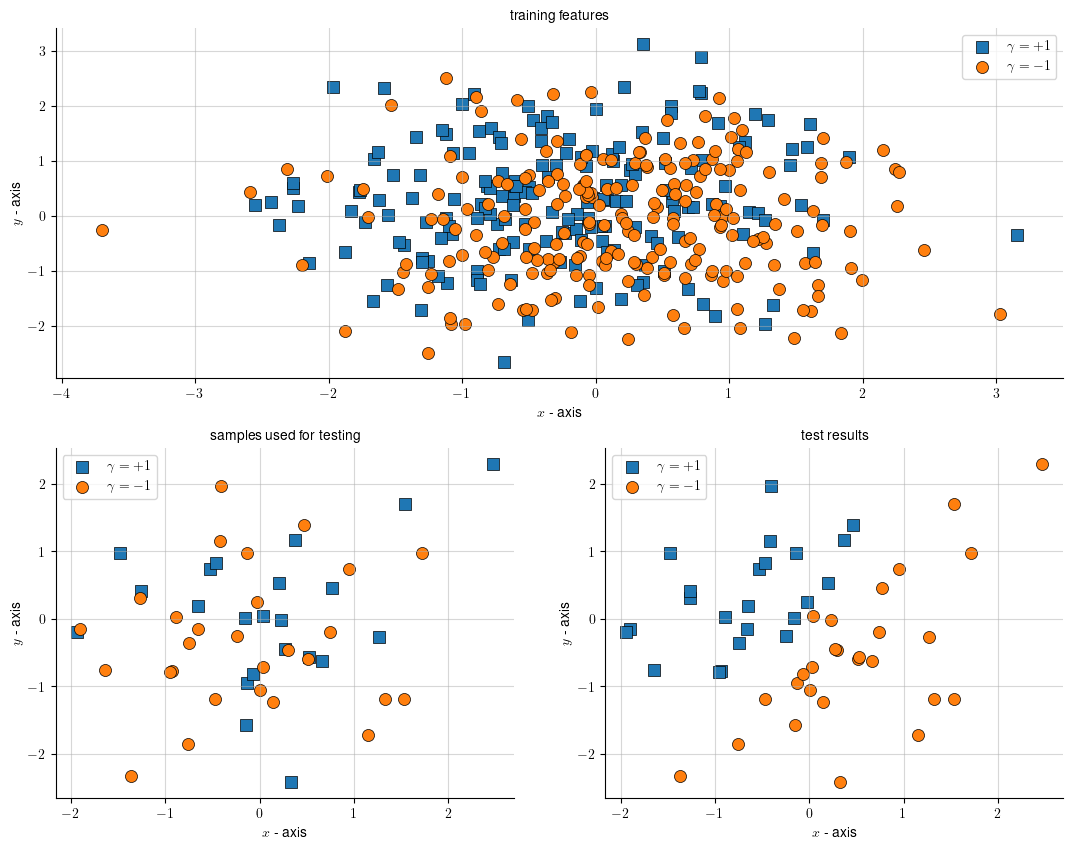

In [25]:
#figure 3 (scatter diagrams)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,10
fig = plt.figure()

ax = fig.add_subplot(2, 2, (1, 2))

ax.scatter(A1[:, 0], A1[:, 1], marker="s", s=75, edgecolors="black", linewidths=0.5, label="$\gamma = +1$")
ax.scatter(A2[:, 0], A2[:, 1], s=75, edgecolors="black", linewidths=0.5, label="$\gamma = -1$")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training features", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()


ax = fig.add_subplot(2, 2, 3)

ax.scatter(A1test[:, 0], A1test[:, 1], marker="s", s=75, edgecolors="black", linewidths=0.5, label="$\gamma = +1$")
ax.scatter(A2test[:, 0], A2test[:, 1], s=75, edgecolors="black", linewidths=0.5, label="$\gamma = -1$")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("samples used for testing", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(2, 2, 4)

ax.scatter(A1_after_testing[:, 0], A1_after_testing[:, 1], marker="s", s=75, edgecolors="black", linewidths=0.5, label="$\gamma = +1$")
ax.scatter(A2_after_testing[:, 0], A2_after_testing[:, 1], s=75, edgecolors="black", linewidths=0.5, label="$\gamma = -1$")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test results", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.show()

**Figure 33.3** ($\textit{Top row}$) A total of $N=400$ pairs $\{h_n,\gamma(n)\}$ used for training in order to learn the predictive distribution. ($\textit{Bottom row}$) The plot on the left shows the $50$ pairs $\{h_n,\gamma(n)\}$ used for testing. The plot on the right shows the labels that are assigned by the test (33.51) to these points.

We illustrate this construction by means of a simulation. A total of $N=400$ feature vectors $\{h_n\in\mathbb{R}^{2}\}$ are generated randomly from a Gaussian distribution with zero mean and unit variance. The weight vector $w\in\mathbb{R}^{2}$ is also generated randomly from a Gaussian distribution with zero mean and variance $\sigma_{w}^2=2$. For each $h_n$, we assign its label to $\gamma(n)=+1$ whenever the following condition is met:

$$
\frac{1}{1+e^{-h_n^{\sf T} w}}\geq 0.5\;\Longrightarrow \;\gamma(n)=+1 \tag{33.52}
$$

Otherwise, the label is assigned to $-1$. The $400$ pairs $\{h_n,\gamma(n)\}$ generated in this manner are used for training (i.e., for learning the conditional and predictive distributions using Laplace method). The samples are shown in the top row of Fig. 33.3. We also generate separately an additional $50$ sample pairs $\{h_n,\gamma(n)\}$ to be used during testing. These samples are shown in the bottom row. Running the gradient-ascent recursion (33.43) for $600$ iterations and computing the resulting covariance matrix leads to

$$
w_{\textnormal{MAP}} = \begin{bmatrix}
1.2766 \\ 1.1055
\end{bmatrix},
R_{w} = \begin{bmatrix}
0.0242 & 0.0081 \\
0.0081 & 0.0210
\end{bmatrix} \tag{33.53}
$$

Using these values, we can predict the label for each of the test features $h_n$ using construction (33.51). We assign $h_n$ to class $\gamma(n)=+1$ if

$$
\left(1+\textnormal{exp}\left\{-\frac{h_n^{\sf T} w_{\textnormal{MAP}}}{\sqrt{1+\pi h_n^{\sf T} R_w h_n/8}}\right\}\right)^{-1}\geq 1/2 
\Longrightarrow\;\gamma(n)=+1 \tag{33.54}
$$

The result is shown in the bottom row of the figure with 12 errors (21\% error rate). In later chapters, we will design more effective learning methods with lower error rates.

One of the main inconveniences of the Laplace approach to learning posterior distributions is that it assumes knowledge of the underlying joint distribution, such as assuming in this example that the labels follow a logistic distribution and that the model $w$ is Gaussian-distributed with known variance $\sigma_{w}^2$. This remark is also applicable to other methods discussed in this chapter. In later chapters, we will study alternative learning methods for solving prediction/classification problems that operate directly on the data $\{h_n,\gamma(n)\}$ without imposing (or assuming) specific probabilistic models for the data distributions. It is instructive, for example, to compare the approach of this example to the results discussed later in  Chapter 59 on logistic regression.

## Example 33.6 (Approximating a beta distribution)

We apply the Metropolis algorithm (33.97) over $J=40,000$ iterations and generate samples $\{x_j\}$ from a beta distribution with positive shape parameters $a=2$ and $b=5$, namely, 

$$
f_{x}(x)=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\,x^{a-1}(1-x)^{b-1},\;\;\;x\in[0,1] \tag{33.99}
$$

We generate the successive samples according to (33.96) with $v\sim {\cal N}_{v}(0,0.01)$:
 
$$
\left\{ \begin{array}{ll}
        \textnormal{sample } v \sim \cal N_{v}(0,0.01) \\
        \textnormal{set } x'=x_{j-1} + v \\
        \textnormal{calculate } A(x', x_{j-1}) = f_{x}(x')/f_{x}(x_{j-1}) \\
        \textnormal{sample from the uniform distribution, } u \sim \cal U[0, 1] \\
        \textnormal{set } x_{j} =
        \left\{ \begin{array}{ll}
                x' \textnormal{, if } A(x', x_{j-1}) \geq u \\
                x_{j-1} \textnormal{, otherwise}
        \end{array} \right.
\end{array} \right. \tag{33.100}
$$


The result is shown in Fig. 33.4, where the smooth curve corresponds to the actual beta distribution.

In [2]:
a = 2 # parameters of a beta distribution; it support is [0, 1]
b = 5
mean_beta = a/(a+b)
variance_beta = a*b/(((a+b)**2)*(a+b+1))

NS = 40000 # number of samples

sum = 0
sum2 = 0

for n in range(NS): #computing mean and variance
    x = np.random.rand()
    B = gamma(a+b)/(gamma(a)*gamma(b))
    beta_x = B*(x**(a-1))*((1-x)**(b-1))
    pi_x = 1
    w = beta_x/pi_x
    sum += w*x
    sum2 += w*x**2

mean_value = sum/NS
variance_value = (sum2/NS) - mean_value**2

print("exact and simulated means")
print(mean_beta, mean_value)
print("exact and simulated means")
print(variance_beta, variance_value)

x = np.random.rand() #initial condition
var_noise = 0.01

h = np.zeros(NS)
j = 0

for n in range(NS):
    xprime = x + np.sqrt(var_noise)*np.random.randn()
    B = gamma(a+b)/(gamma(a)*gamma(b))
    beta_xprime = B*(xprime**(a-1))*((1-xprime)**(b-1))
    beta_x = B*(x**(a-1))*((1-x)**(b-1))
    pi_x = scalar_gaussian(xprime, x, var_noise)
    pi_xprime = scalar_gaussian(x, xprime, var_noise)
    A = (beta_xprime/beta_x)*(pi_x/pi_xprime)
    u = np.random.rand()
    if A >= u:
        x = xprime
    h[j] = x #save generated sample
    j += 1

x = np.linspace(0, 1, 100)
f = (gamma(a+b)/(gamma(a)*gamma(b)))*(x**(a-1))*(1-x)**(b-1) #compute beta distribution

print("number of samples AND number of samples retained AND percentage")
print(NS, j, (j/NS)*100)

exact and simulated means
0.2857142857142857 0.2870892123039377
exact and simulated means
0.025510204081632654 0.025281639944676068
number of samples AND number of samples retained AND percentage
40000 40000 100.0


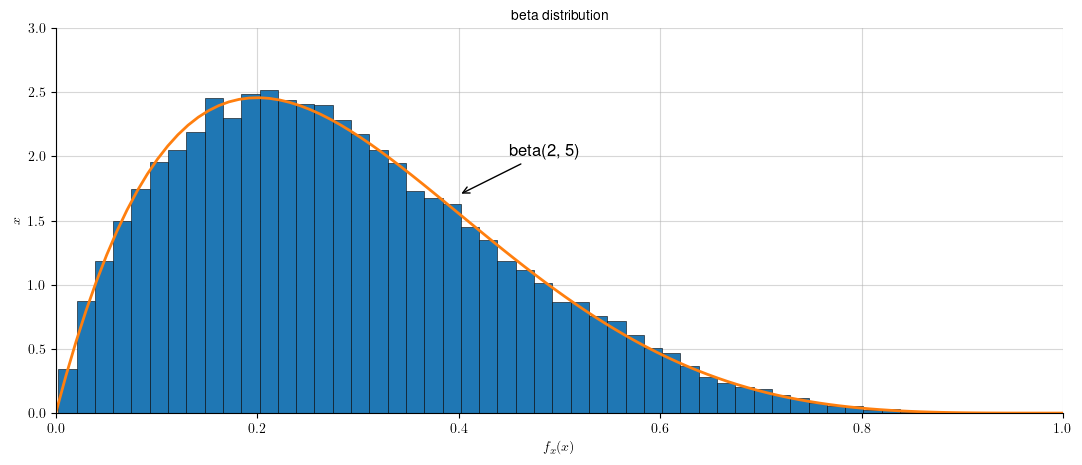

In [8]:
#figure 4 (Beta distribution)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13,5
fig = plt.figure()

ax = fig.add_subplot(111)

ax.hist(h, bins=50, density=True, zorder=2, edgecolor="black", linewidth=0.4)
ax.plot(x, f, label="beta(2, 5)", linewidth=2)
ax.set_xlabel("$f_x(x)$", fontsize=10)
ax.set_ylabel("$x$", fontsize=10)
ax.set_title("beta distribution", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.annotate("beta(2, 5)", xy=(0.4, 1.7), xytext=(0.45, 2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=12, fontweight='bold')
#plt.legend()

ax.set_xlim([0, 1])
ax.set_ylim([0, 3])

plt.savefig("figs/fig-4.pdf", format="pdf", bbox_inches="tight")

plt.show()


**Figure 33.4** Histogram constructed from $J=40000$ iterations of  the Metropolis algorithm (33.97) for a beta distribution with parameters $a=2$ and $b=5$. 

## Example 33.7 (Evaluating posterior distributions)

The main reason for computing the evidence in (33.69) is because we need it to evaluate the posterior $f_{z|y}(z|y)$. However, now, under the Metropolis algorithm (33.97) we can evaluate the conditional pdf without the need to compute first the evidence, $f_{y}(y)$. For this purpose, the pdf $f_{z|y}(z|y)$ plays the role of  $f_{x}(x)$ for which we want to generate samples (so that a histogram can be generated for it). We do not know $f_{z|y}(z|y)$ exactly due to the missing normalization factor $f_{y}(y)$. However, we know the product that appears in the numerator, namely, $f_{z}(z)f_{y|z}(y|z)$, which is proportional to $f_{z|y}(z|y)$. Therefore, this product plays the role of the function $g(x)$. By using it in the Metropolis algorithm (33.97), we iterate for $J=5000$ times and generate samples for the desired conditional $f_{z|y}(z|y)$:

$$
\left\{ \begin{array}{ll}
        \textnormal{sample } v \sim \cal N_{v}(0,\sigma_{v}^2) \\
        \textnormal{set } z'=z_{j-1} + v \\
        \textnormal{calculate } A(z', z_{j-1}) = \frac{f_z(z')f_{y|z}(y|z')}{f_z(z_{j-1})f_{y|z}(y|z_{j-1})} \\
        \textnormal{sample from the uniform distribution, } u \sim \cal U[0, 1] \\
        \textnormal{set } z_{j} =
        \left\{ \begin{array}{ll}
                z' \textnormal{, if } A(z', z_{j-1}) \geq u \\
                z_{j-1} \textnormal{, otherwise}
        \end{array} \right.
\end{array} \right. \tag{33.101}
$$

Let us apply this construction to the logistic model with Gaussian latent variable $w$ from  Example 33.1. We already applied the Laplace method to estimate the conditional pdf of $w$ given the labels $\{\gamma(n)\}$, for $n=1,2,\ldots,N$. This led to result (33.44), namely, 

$$
f_{w|\gamma_N}(w|\gamma_N; H_N) \approx {\cal N}_{w}(w_{\textnormal{MAP}},R_w) \tag{33.102}
$$

with mean $w_{\rm MAP}$ and covariance matrix $R_w$.  We will evaluate this same posterior by using instead the Metropolis algorithm (33.97).  In this simulation, and for simplicity, we assume $M=2$ so that we are dealing with a two-dimensional vector $w$. We know from (33.25) 
that the desired posterior is proportional to

$$
f_{w|\gamma_N}(w|\gamma_N; H_N)\propto f_{\gamma_N|w}(\gamma_N|w; H_N)\,
f_{w}(w) \tag{33.103}
$$

where

$$
f_{w}(w)={\cal N}_{w}(0,\sigma_{w}^2 I_2) \tag{33.104a}
$$

$$
f_{\gamma_N|w}(\gamma_N|w; H_N)=\prod_{n=1}^{N} \left(\frac{1}{1+e^{-h_n^{\sf T} w}}\right)^{\frac{1+\gamma(n)}{2}}\times \left(\frac{1}{1+e^{h_n^{\sf T} w}}\right)^{\frac{1-\gamma(n)}{2}} \tag{33.104b}
$$

The term on the right-hand side of (33.103) therefore plays the role of $g(x)$. The listing of the algorithm for this case would take the following form:

$$
\left\{ \begin{array}{ll}
        \textnormal{sample } w \sim \cal N_{v}(0,\sigma_{w}^2I) \\
        \textnormal{set } w'=w_{j-1} + v \\
        \textnormal{calculate } A(w', w_{j-1}) = \frac{f_{\gamma|w}(\gamma_N|w'; H_N)f_{w}(w')}{f_{\gamma|w}(\gamma_N|w_{j-1}; H_N)f_{w}(w_{j-1})} \\
        \textnormal{sample from the uniform distribution, } u \sim \cal U[0, 1] \\
        \textnormal{set } w_{n} =
        \left\{ \begin{array}{ll}
                w' \textnormal{, if } A(w', w_{j-1}) \geq u \\
                w_{j-1} \textnormal{, otherwise}
        \end{array} \right.
\end{array} \right. \tag{33.105}
$$

In the simulations, we have $N=400$ observations $\{\gamma(n),h_n\}$ and run the Metropolis algorithm for $J=40,000$ iterations. We  use $\sigma_v^2=0.01$. 
Figure 33.5 plots the (normalized) histogram distributions for the first and second components of the latent variable $w$. Using the samples generated by the Metropolis algorithm, we estimate the mean and covariance matrix of $w$ as follows:

$$
\bar{w}_{\textnormal{Metropolis}} = 
\begin{bmatrix}
1.2901 \\
1.1168
\end{bmatrix}, \;\;\;
R_{w, \textnormal{Metropolis}} = 
\begin{bmatrix}
0.0275 & 0.0066 \\
0.0066 & 0.0237
\end{bmatrix} \tag{33.106}
$$

These values can be compared against the estimates $(\bar{w},R_w)$ generated by the  Laplace method in (33.53). Figure 33.5  plots the Gaussian distributions for the components of $w$ that result from the Laplace method, namely, 
${\cal N}_{w_1}(1.2766, 0.0242)$ and ${\cal N}_{w_2}(1.1055, 0.0210)$.

In [62]:
w = np.sqrt(sigma_w2)*np.random.randn(M, 1)

w = np.array([
    [-1.8043], [-1.9185]
])

var_noise = 0.01
j = 0

NS = 10000

w_vec = np.zeros((M, NS))

for ell in range(NS):
    wprime = w + np.sqrt(var_noise)*np.random.randn(M, 1)
    prod = 1
    prodprime = 1
    for n in range(N):
        h = H[:, n]
        gam = gamma_vec[n]
        aprime = np.exp(h.T@wprime)
        a = np.exp(h.T@w)
        prodprime = prodprime*((1/(1+(1/aprime)))**((1+gam)/2))*((1/(1+aprime))**((1-gam)/2))
        prod = prod*((1/(1+(1/a)))**((1+gam)/2))*((1/(1+a))**((1-gam)/2))

    b = vector_gaussian(w.reshape(1, -1), np.zeros((M, 1)).reshape(1, -1), np.eye(M)*sigma_w2)
    bprime = vector_gaussian(wprime.reshape(1, -1), np.zeros((M, 1)).reshape(1, -1), np.eye(M)*sigma_w2)
    A = (prodprime/prod)*(bprime/b)
    u = np.random.rand()
    if A >= u:
        w = wprime
    w_vec[:, j] = w.reshape(-1) #save generated sample
    j += 1

print("number of samples AND number of samples retained AND percentage")
print(NS, j, (j/NS)*100)

w1 = w_vec[0, :]
w2 = w_vec[1, :]

wmean_metropolis = w_vec.mean(axis=1)

NL = max(w_vec.shape)
X = np.zeros((M, M))
for n in range(NL): #estimating covariance from Metropolis
    a = w_vec[:, n].reshape(-1, 1)
    X += a@a.T

X /= NL
Rw_metropolis = X - wmean_metropolis.reshape(-1, 1)@wmean_metropolis.reshape(-1, 1).T

print("Mean by Laplace: ", wmean)
print("Mean by Metropolis: ", wmean_metropolis)
print("Variance by Laplace: ", Rw)
print("Variance by Metropolis: ", Rw_metropolis)

sigma1 = Rw[0, 0]
sigma2 = Rw[1, 1]

x = np.arange(-2, 2, 0.01)
f1 = (1/np.sqrt(2*np.pi*sigma1))*(np.exp((-0.5/sigma1)*(x-wmean[0])**2)) # Gaussian pdfs generated by Laplace's method for comparison
f2 = (1/np.sqrt(2*np.pi*sigma2))*(np.exp((-0.5/sigma2)*(x-wmean[1])**2))


number of samples AND number of samples retained AND percentage
10000 10000 100.0
Mean by Laplace:  [[-0.47910301]
 [ 0.36207703]]
Mean by Metropolis:  [-0.48940585  0.35906057]
Variance by Laplace:  [[ 0.0116361  -0.00094862]
 [-0.00094862  0.00999281]]
Variance by Metropolis:  [[0.0157021  0.00503476]
 [0.00503476 0.01884179]]


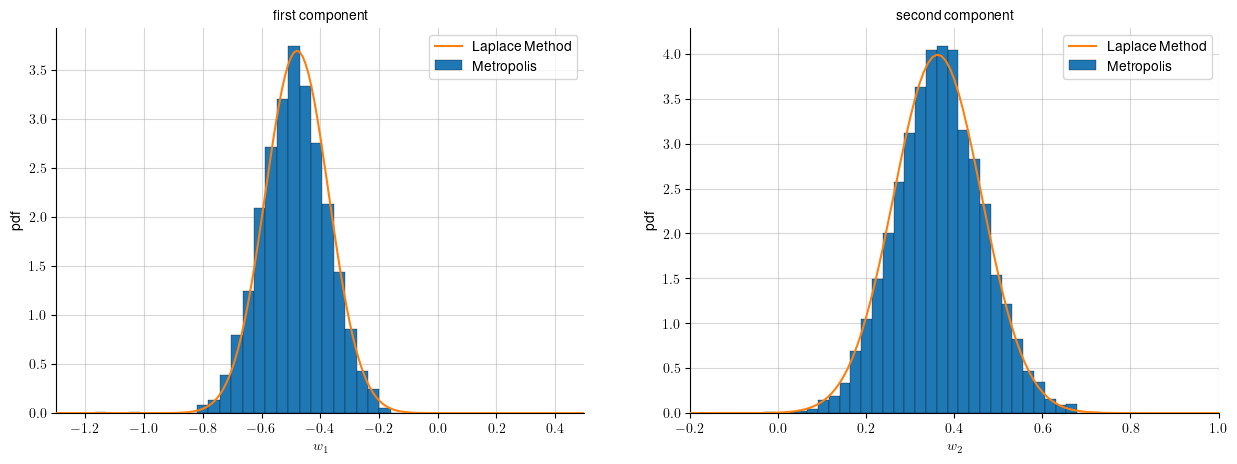

In [70]:
#figure 5 (Metropolis Hastings)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 5
fig = plt.figure()

ax = fig.add_subplot(121)

ax.plot(x, f1, label="Laplace Method", color="tab:orange", zorder=3)
ax.hist(w1, bins=50, density=True, label="Metropolis", color="tab:blue", zorder=2, edgecolor="black", linewidth=0.2)
ax.set_xlabel("$w_1$", fontsize=10)
ax.set_ylabel("pdf", fontsize=10)
ax.set_title("first component", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim([-1.3, 0.5])
plt.legend()

ax = fig.add_subplot(122)

ax.plot(x, f2, label="Laplace Method", color="tab:orange", zorder=3)
ax.hist(w2, bins=100, density=True, label="Metropolis", color="tab:blue", zorder=2, edgecolor="black", linewidth=0.2)
ax.set_xlabel("$w_2$", fontsize=10)
ax.set_ylabel("pdf", fontsize=10)
ax.set_title("second component", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim([-0.2, 1])
plt.legend()

plt.show()


**Figure 33.5** Histogram distributions for the first and second component of the latent variable $w$ constructed from $J=40,000$ iterations of the Metropolis algorithm (33.97). 